# HW CI-7 CNN Fashion


Computational Intelligence  - STRATEGOS  UNIGE

Names (s) Muhammad Ashir Wahid and Ambreen Aslam

Date 12/5/2022




## Assignment: Implement a CNN in Keras

We will implement a Convolutional Neural Network in Keras

Then we will apply our CNN to Fashion MNIST dataset 


### CNN Fashion Mnist - Challenge CI Strategos 2021-22
After submitted your Homework on the Aulaweb of the CI course
your best result to the [shared table](https://docs.google.com/spreadsheets/d/1RwZDt9mmNH-eMusX6Yqukw1-v_oHSWSQDVlKqF-e97w/edit?usp=sharing) before the due date of the Homework

The winner(s) of the challenge will receive .5 extra-mark

## Pre-requisites:

It is possible to run this notebook locally on a jupyter installation, but we recommend to run this this notebook in the cloud on [Google Colab](https://colab.research.google.com/?utm_source=scs-index) because Colab makes possible to test the execution both on the standard CPU kernel and on a GPU powered one.

You can switch between them by selecting the following menuitems: Edit $\rightarrow$ Notebook settings $\rightarrow$ Hardware accelerator

Local execution requires to [install TensorFlow](https://www.tensorflow.org/install/), which is not always an easy task due to different version of dependent libraries, and [tf.keras](https://www.tensorflow.org/guide/keras) which
is TensorFlow's high-level API for building and training deep learning models. 

You may find detailed documentation at [Keras Guide](https://keras.io/)  [(see  also here)](https://www.tensorflow.org/guide/keras).

## Required imports:

In [1]:
pip install tensorflow

     |████████████████████████████████| 462 kB 9.8 MB/s 


In [2]:

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys
import time

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd

print(tf.__version__)

2.8.0


## Download the Fashion-MNIST dataset 


The MIST data set of handwritten digits
* is too easy (convolutional nets can achieve 99.7%) 
* is overused. 
* can not represent modern Computer Vision tasks

[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) consists of 60,000 training images and 10,000 test images. It is a MNIST-like fashion product database. The developers believe MNIST has been overused so they created this as a direct replacement for that dataset. Each image is in greyscale and associated with a label from 10 classes.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. 
Each example is a 28x28 grayscale image, associated with a label from 10 classes.


Fashion-MNIST  serves as a direct drop-in replacement for the original MNIST dataset for benchmarking machine learning algorithms. It shares the same image size and structure of training and testing splits.

* Size: 30 MB

* Number of Records: 70,000 images in 10 classes

* Images are 28x28 NumPy arrays, with pixel values ranging between 0 and 255. 

* Labels are an array of integers, ranging from 0 to 9.

Label	Description
0.	T-shirt/top
1.	Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot

On https://github.com/zalandoresearch/fashion-mnist there is a list of benchmarks and the related NN architectures.

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
size_x=28
size_y=28
# reshape images to specify that it's a single channel
train_images = train_images.reshape(train_images.shape[0], size_x, size_y, 1)
test_images = test_images.reshape(test_images.shape[0], size_x, size_y, 1)

4431872/4422102 [==============================] - 0s 0us/step


Let's convert the image pixels into a range of 0 to 1 before feeding to the neural network model by dividing the values of both the *training set* and the *testing set* by 255.

In [4]:
def preprocess_images(imgs): # should work for both a single image and multiple images
    sample_img = imgs if len(imgs.shape) == 2 else imgs[0]
    assert sample_img.shape in [(size_x, size_y, 1), (size_x, size_y)], sample_img.shape # make sure images are 28x28 and single-channel (grayscale)
    return imgs / 255.0

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

Display the first *count* images from the *training set* and display the class name below each image. 

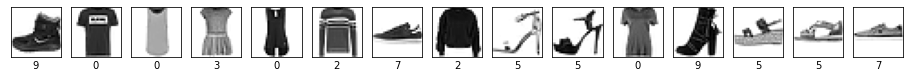

In [5]:
count = 15
plt.figure(figsize=(16,1))
for i in range(count):
    plt.subplot(1,count,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(size_x, size_y), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])


### Optimize the CNN model

Building the neural network requires configuring the layers of the model, then compiling the model. Here follows one possible configuration.

You should analyze the present configuration and add other building blocks to obtain your best generalization result (accuracy) on the test set. 

Take inspiration from the Demos on Keras,  the documentation of [Keras](https://keras.io/) and on the architectures of benchmarks listed on the site of [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist).
 


In [16]:
from tensorflow.keras.layers import Bidirectional
from keras.layers.recurrent import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras import backend as K
inputShape = (size_x, size_y, 1)



model = keras.Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation='relu', input_shape = inputShape))
model.add(Conv2D(filters = 32, kernel_size = (6,6), activation='relu'))
model.add(MaxPooling2D(strides=(2,2)))

model.add(MaxPooling2D(strides=(2,2)))

model.add(Dropout(0.5, input_shape=(inputShape)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))



print(model.summary())
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 conv2d_3 (Conv2D)           (None, 21, 21, 32)        73760     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 32)          0         
                                                                 
 flatten_1 (Flatten)         (None, 800)              

## Model compilation

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* - measures how accurate the model is during training, we want to minimize this with the optimizer.
* *Optimizer* - how the model is updated based on the data it sees and its loss function.
* *Metrics* - used to monitor the training and testing steps. "accuracy" is the fraction of images that are correctly classified.

Those setting are relevant to improve the generalization on the test set and the learning time.
See the [Keras documentation](https://keras.io/) to select the optimal setting.

In [17]:
model.compile(optimizer=tf.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### Model training


Being in a context of *supervised learning*, training the neural network model requires to call the `model.fit` method on the training data `train_images` and the relevant ground truth `train_labels`.

To make predictions we use a test set `test_images` and check the predictions against the `test_labels` array. 

In [18]:
import tensorflow as tf
from tensorflow import keras

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
print(train_images.shape)
t_before = time.time()    
history = model.fit(train_images, train_labels, validation_data=(test_images, test_labels),epochs=40,validation_split=0.2,batch_size=20,
                    callbacks=[callback],)
t_after = time.time()
t_training = t_after - t_before
print()
print("Training time (seconds)", t_training)

(60000, 28, 28, 1)
Epoch 1/40
2400/2400 [==============================] - 9s 4ms/step - loss: 0.8845 - accuracy: 0.6761 - val_loss: 0.5340 - val_accuracy: 0.8019
Epoch 2/40
2400/2400 [==============================] - 8s 4ms/step - loss: 0.5519 - accuracy: 0.7992 - val_loss: 0.4601 - val_accuracy: 0.8307
Epoch 3/40
2400/2400 [==============================] - 8s 3ms/step - loss: 0.4961 - accuracy: 0.8191 - val_loss: 0.4181 - val_accuracy: 0.8483
Epoch 4/40
2400/2400 [==============================] - 8s 3ms/step - loss: 0.4640 - accuracy: 0.8300 - val_loss: 0.4154 - val_accuracy: 0.8501
Epoch 5/40
2400/2400 [==============================] - 9s 4ms/step - loss: 0.4422 - accuracy: 0.8403 - val_loss: 0.3797 - val_accuracy: 0.8646
Epoch 6/40
2400/2400 [==============================] - 8s 3ms/step - loss: 0.4242 - accuracy: 0.8451 - val_loss: 0.3700 - val_accuracy: 0.8653
Epoch 7/40
2400/2400 [==============================] - 8s 3ms/step - loss: 0.4101 - accuracy: 0.8499 - val_loss: 0.3

## CNN Fashion Mnist - Challenge CI Strategos 2021/22

Add your best result to the [shared table](https://docs.google.com/spreadsheets/d/1RwZDt9mmNH-eMusX6Yqukw1-v_oHSWSQDVlKqF-e97w/edit?usp=sharing)

### Additional Discussion Here
* ...

We use 2 convolution layers followed by 2 Maxpool layers which mainly helps in extracting sharp and smooth features. It is also done to reduce variance and computations. Max-pooling helps in extracting low-level features like edges, points, etc

Dropout layer is used to avoid overfitting of data

Furthermore Dense Layer is used  which is to classify image based on output from convolutional layers.
We also applied Flattening which allows converting the data into a 1-dimensional array for inputting it to the next layer.

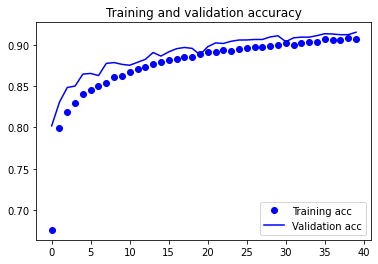

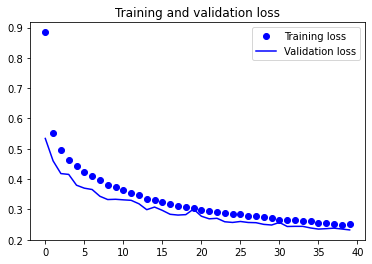

In [19]:
import matplotlib.pyplot as plt

%matplotlib inline

acc = history.history['accuracy']

val_acc = history.history['val_accuracy']

loss = history.history['loss']

val_loss = history.history['val_loss'] 



epochs = range(len(acc))



plt.plot(epochs, acc, 'bo', label='Training acc')

plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')

plt.legend()



plt.figure()



plt.plot(epochs, loss, 'bo', label='Training loss')

plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')

plt.legend()



plt.show()